In [1]:
import matplotlib.pyplot as plt
from tifffile import imwrite, imread, TiffFile
import numpy as np

## Tutorial

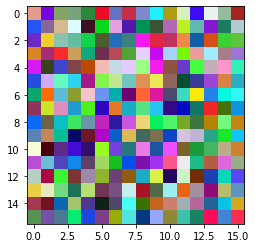

In [2]:
# Read the image from the TIFF file as numpy array:
data = np.random.randint(0, 255, (16, 16, 3), 'uint8')
imwrite('temp.tiff', data, photometric='rgb')
plt.imshow(data)

(16, 16, 3)

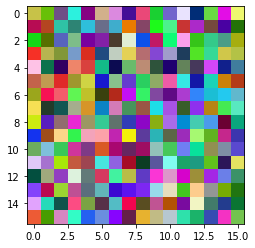

In [3]:
# Read the image from the TIFF file as numpy array:
image = imread('temp.tiff')
plt.imshow(image)
image.shape

In [14]:
# Write a 3D numpy array to a multi-page, 16-bit grayscale TIFF file:
data = np.random.randint(0, 255, (64, 3, 301, 219), 'uint8')
imwrite('temp.tif', data)

In [15]:
# Read the whole image stack from the TIFF file as numpy array:
image_stack = imread('temp.tif')
image_stack.shape

(64, 3, 301, 219)

(3, 301, 219)

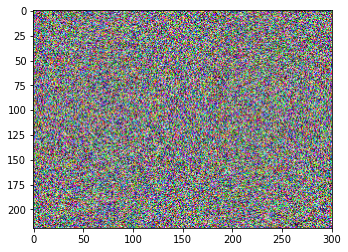

In [18]:
# Read the image from the first page in the TIFF file as numpy array:
image = imread('temp.tif', key=1)
plt.imshow(np.transpose(image, (2, 1, 0)))
image.shape

In [7]:
# Read images from a selected range of pages:
images = imread('temp.tif', key=range(4, 40, 2))
images.shape

(18, 301, 219, 3)

In [8]:
# Iterate over all pages in the TIFF file and successively read images:
with TiffFile('temp.tif') as tif:
    for page in tif.pages:
        image = page.asarray()

In [10]:
# Get information about the image stack in the TIFF file without reading the image data:

tif = TiffFile('temp.tif')
print("len", len(tif.pages))  # number of pages in the file

page = tif.pages[0]  # get shape and dtype of the image in the first page
print("shape", page.shape)
print("dtype", page.dtype)
print("axes", page.axes)

series = tif.series[0]  # get shape and dtype of the first image series
print("series", series.shape, series.dtype, series.axes)
tif.close()

len 64
shape (301, 219, 3)
dtype uint8
axes YXS
series (64, 301, 219, 3) uint8 QYXS


In [13]:
# Inspect the "XResolution" tag from the first page in the TIFF file:
with TiffFile('temp.tif') as tif:
    tag = tif.pages[0].tags['XResolution']
print(tag.value, tag.name, tag.code, tag.count)

(1, 1) XResolution 282 1


In [3]:
images = imread('t1.tiff', level=2)
images.shape

(656, 432, 3)

In [4]:
images.

dtype('uint8')